### Импортируем библиотеки и датасет

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math = pd.read_csv('stud_math.csv')

### Первичный взгляд на датасет

In [112]:
display(math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Информация о колонках

In [113]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [114]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### Кол-во пропусков в признаках

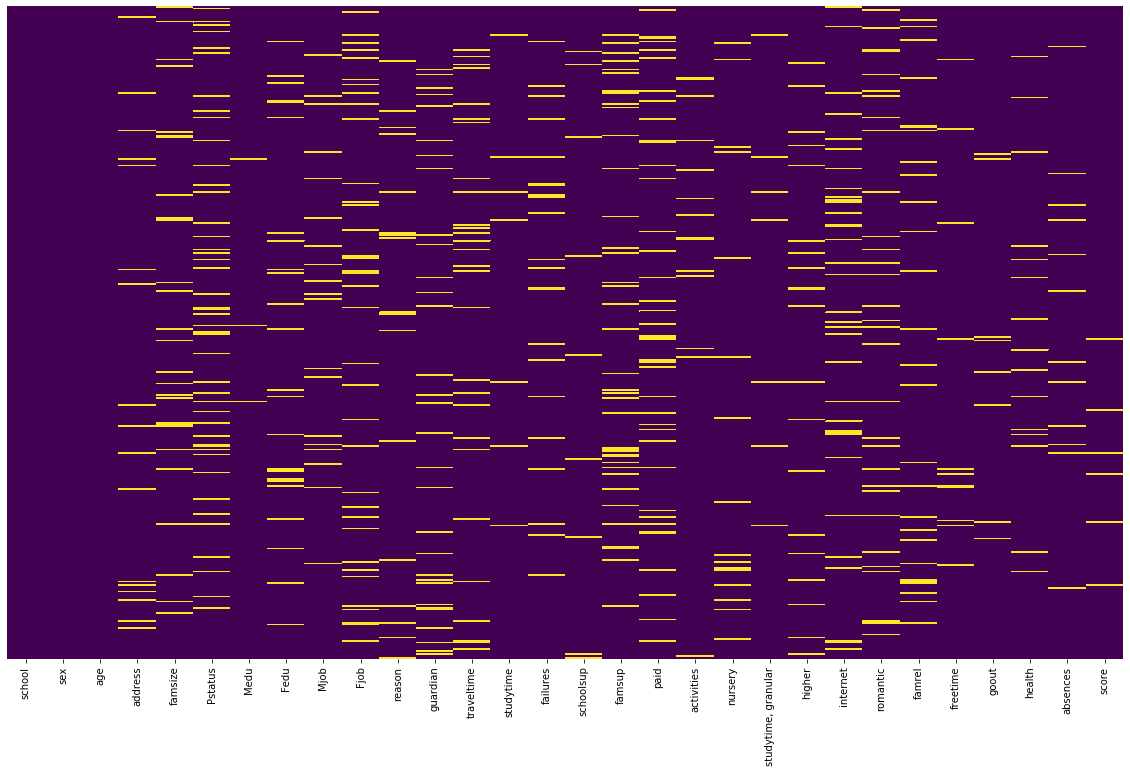

In [118]:
fig, ax = plt.subplots(figsize=(20, 12))
sns_heatmap = sns.heatmap(
    math.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [141]:
math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

### Поиск выбросов

Далее будут показаны признаки у которых наблюдаются выбрасы значений

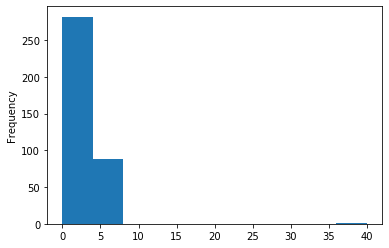

In [134]:
math.Fedu.plot.hist()

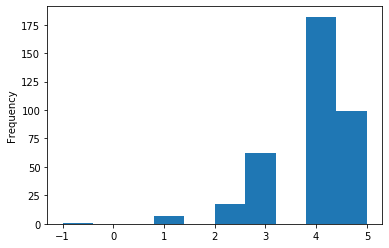

In [136]:
math.famrel.plot.hist()

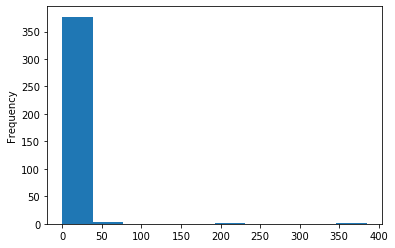

In [137]:
math.absences.plot.hist()

### Убираем выбрасы для признаков

In [139]:
math['Fedu'] = math['Fedu'].apply(lambda w: np.log(w + 1))
math['famrel'] = math['famrel'].apply(lambda w: np.log(w + 1))
math['absences'] = math['absences'].apply(lambda w: np.log(w + 1))

ValueError: supplied range of [-inf, 1.791759469228055] is not finite

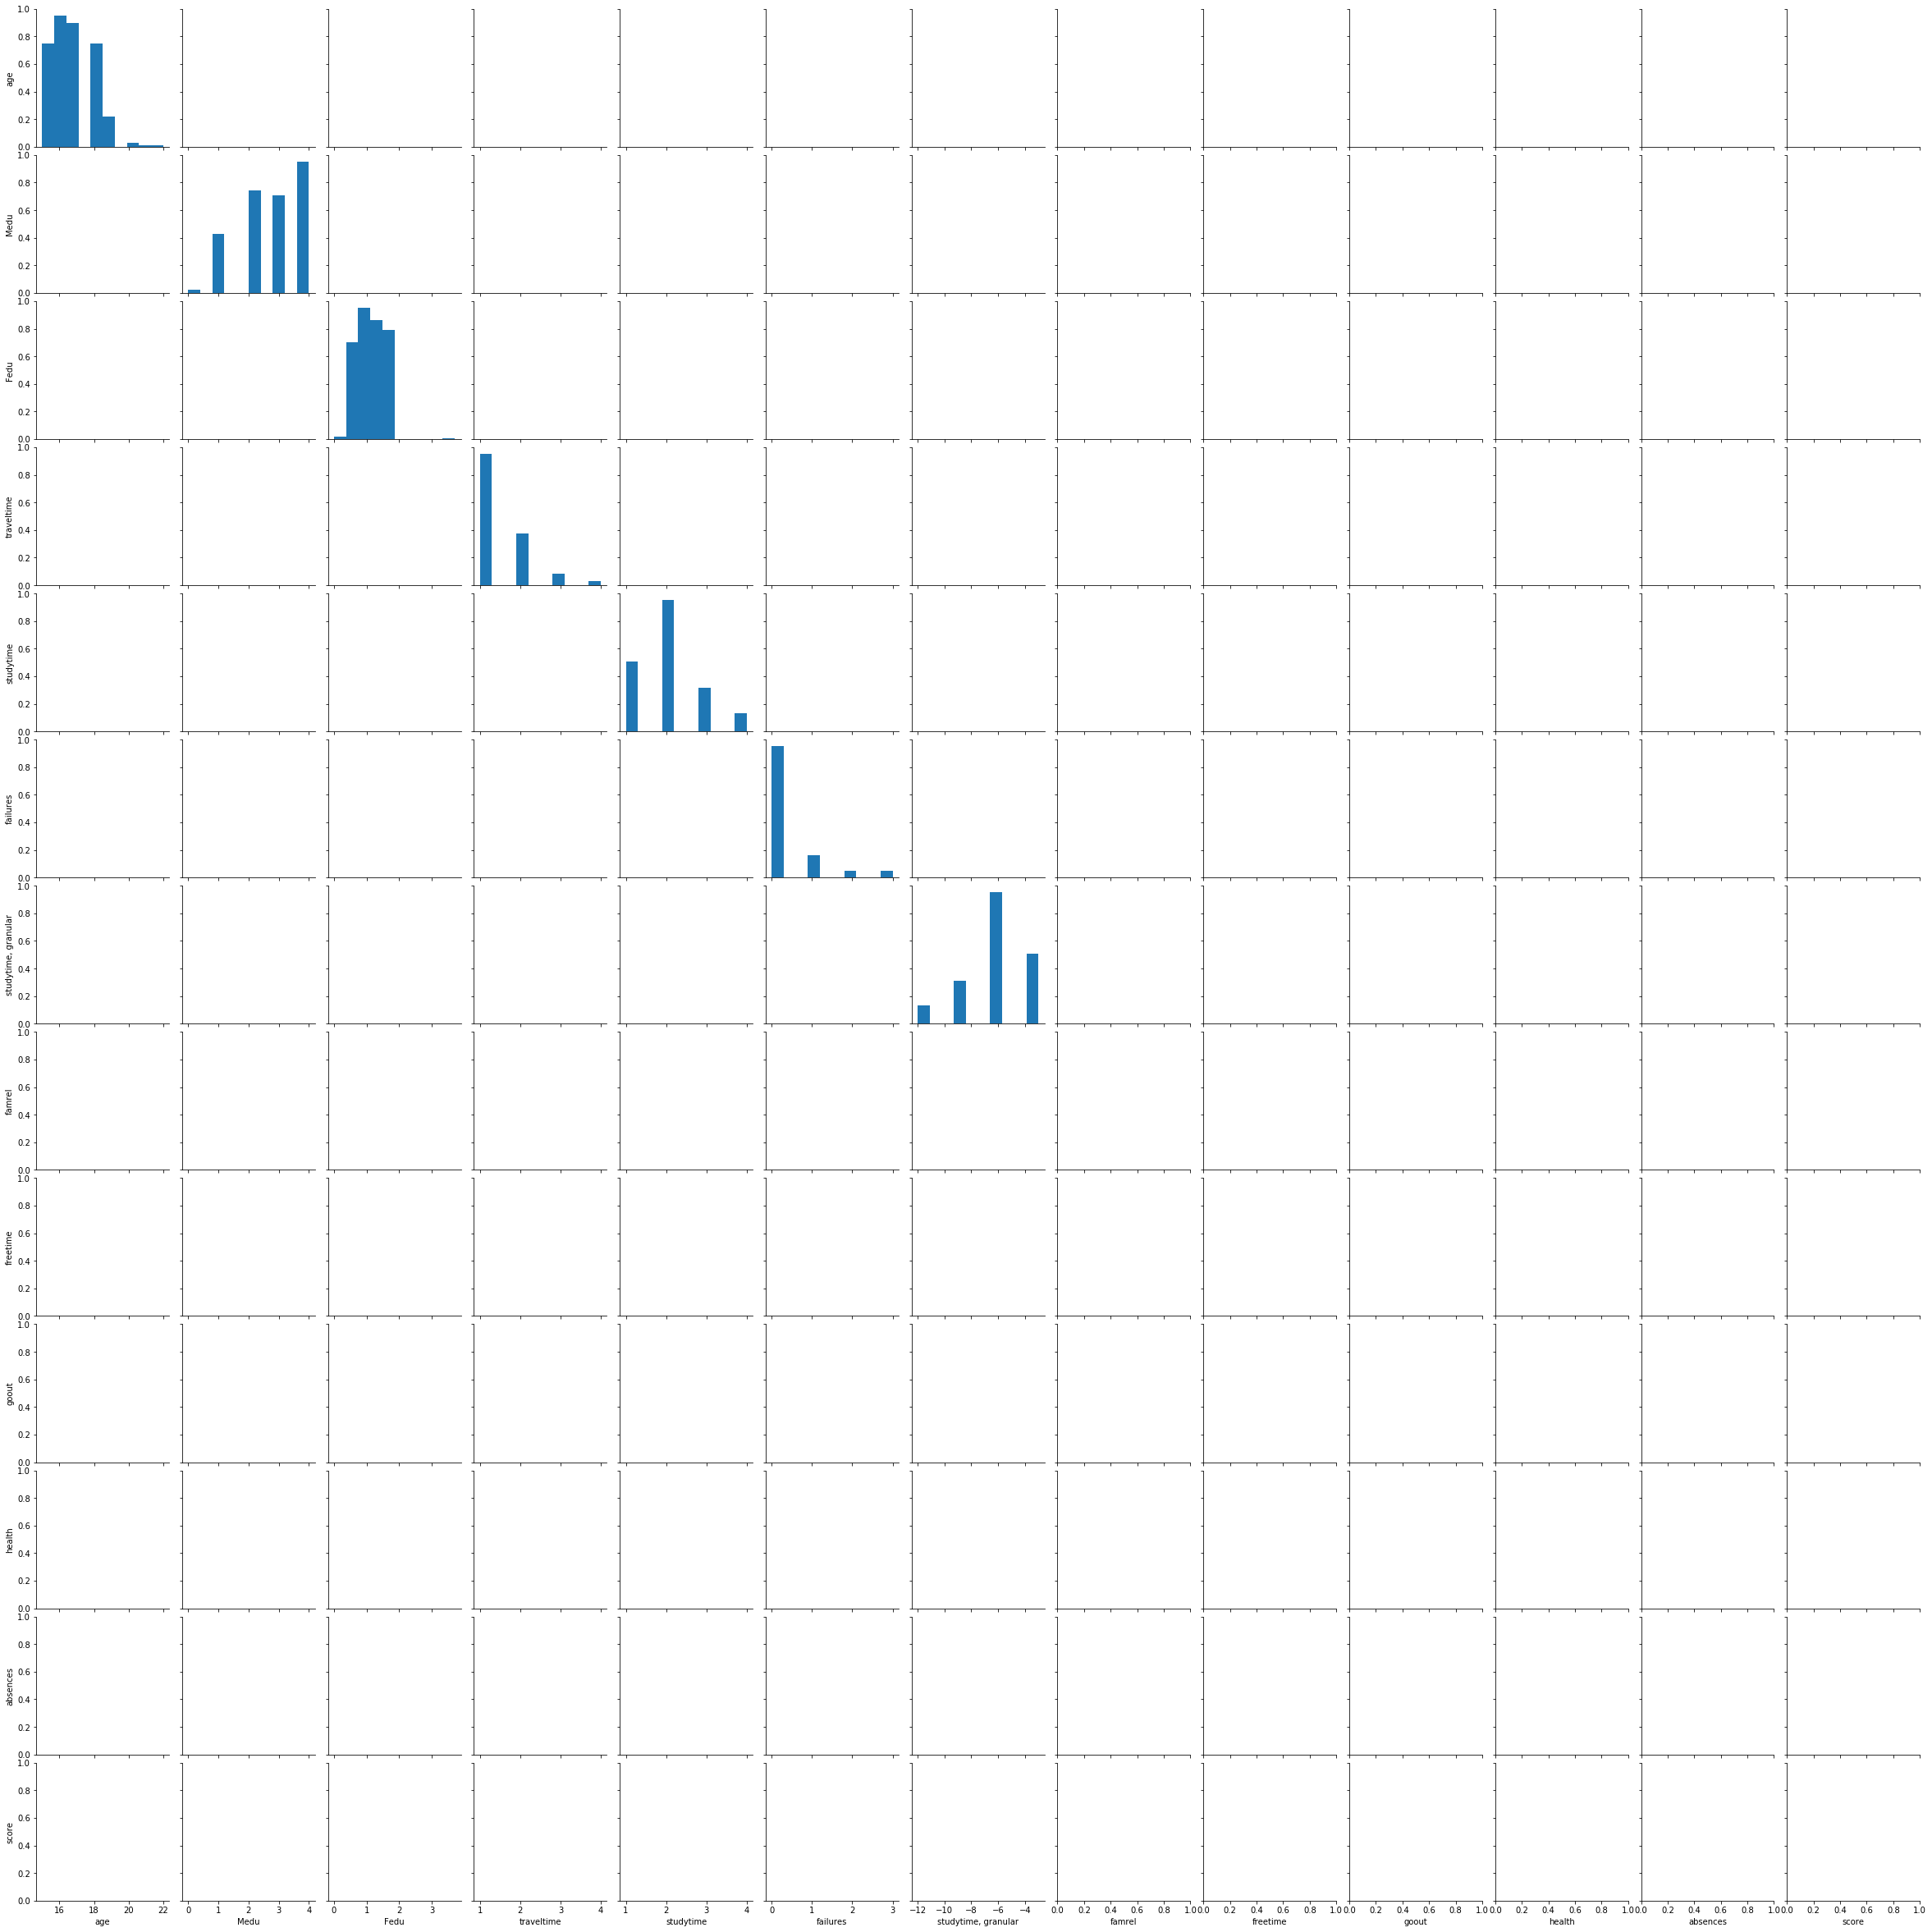

In [142]:
sns.pairplot(math, kind = 'reg')

### Корреляция признаков

In [140]:
math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.172711,0.081508,-0.015556,0.228047,0.015556,0.062650,0.029023,0.135107,-0.065946,0.149995,-0.155726
Medu,-0.161704,1.000000,0.564380,-0.173515,0.078589,-0.245463,-0.078589,-0.037503,0.025335,0.064164,-0.045051,0.077649,0.213349
Fedu,-0.172711,0.564380,1.000000,-0.114598,0.035312,-0.271115,-0.035312,-0.008562,-0.048061,0.021740,0.021055,0.017527,0.125383
traveltime,0.081508,-0.173515,-0.114598,1.000000,-0.102206,0.064699,0.102206,-0.029700,-0.021937,0.037636,-0.021531,-0.029822,-0.070559
studytime,-0.015556,0.078589,0.035312,-0.102206,1.000000,-0.178992,-1.000000,0.017882,-0.121969,-0.051280,-0.080016,-0.047275,0.115741
failures,0.228047,-0.245463,-0.271115,0.064699,-0.178992,1.000000,0.178992,0.009944,0.098382,0.120914,0.081284,0.068134,-0.344338
"studytime, granular",0.015556,-0.078589,-0.035312,0.102206,-1.000000,0.178992,1.000000,-0.017882,0.121969,0.051280,0.080016,0.047275,-0.115741
famrel,0.062650,-0.037503,-0.008562,-0.029700,0.017882,0.009944,-0.017882,1.000000,0.163342,0.068154,0.111806,-0.097491,0.042237
freetime,0.029023,0.025335,-0.048061,-0.021937,-0.121969,0.098382,0.121969,0.163342,1.000000,0.296437,0.061575,0.003439,0.019026
goout,0.135107,0.064164,0.021740,0.037636,-0.051280,0.120914,0.051280,0.068154,0.296437,1.000000,-0.015608,0.102736,-0.129685


### Краткий вывод

У прогнозируемого признака "score" больше всего корреляция есть у признаков "Medu", "studytime", "Fedu", "absences". На основе этих признаков можно попытаться обучить модель для прогнозирования "score"